In [145]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import axes3d

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, cohen_kappa_score

In [31]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher.csv'
iris = pd.read_csv(url)
iris_groups = iris.groupby('species')
print(iris.columns.values)
iris.head()

['species' 'petal_width' 'petal_length' 'sepal_width' 'sepal_length']


,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


You can use scatterplots to help you see where the groups are.  There are some automated tools for this (see scatterplot matrices) but in this case, let's manually change the x and y variables to investigate which combination of variables best separates the groups.

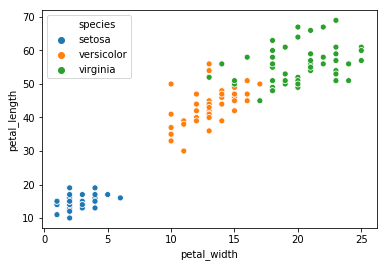

In [32]:
%matplotlib inline

seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')

Of course scatterplots don't need to be in two dimensions.  We can use different symbols (e.g., exes and ohs) or hue to visualize different categories.  We could use dot size (e.g., bubble plots) to indicate a third quantitative variable.

Alternatively, we could construct a 3D plot to visualize a third quantitative variable (and then use size to visualize a fourth, if we wanted!).

<IPython.core.display.Javascript object>


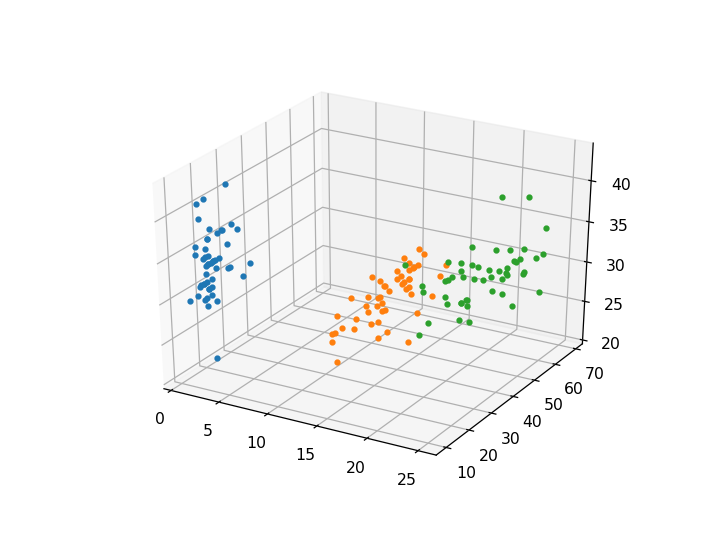

In [33]:
# We'll use the notebook plotting mechanism to do this one, since it's interactive.
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in iris_groups:
    ax.plot3D(group['petal_width'],group['petal_length'],group['sepal_width'],'.')

# Linear Discriminant Analysis

[[ 2.46 14.62]
 [13.26 43.22]
 [20.06 55.52]]


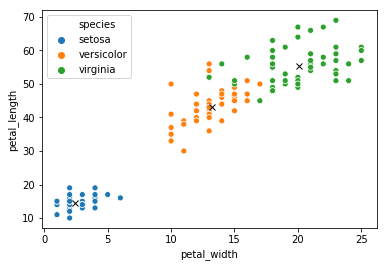

In [134]:
# Create a LDA object
lda = LinearDiscriminantAnalysis()

# Fit the data
X = iris.loc[:,['petal_width','petal_length']]
y = iris['species']
lda_result = lda.fit(X, y)

# The predicted labels/categories can be recovered like so:
predictions = lda.predict(X)

#See the results
print(lda_result.means_)

%matplotlib inline
_ = seaborn.scatterplot(data=iris,x='petal_width',y='petal_length',hue='species')
_ = plt.plot(lda_result.means_[:,0],lda_result.means_[:,1],'kx')

# Classification accuracy assessment

In [152]:
# Many tools are available in scikit learn to assess accuracy
c_matrix = confusion_matrix(df.species,predictions)
print(c_matrix)

class_report = classification_report(df.species,predictions,labels=np.unique(df.species))
print(class_report)

kappa = cohen_kappa_score(df.species,predictions)
print('Cohens Kappa:',kappa)

[[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.96      0.93        50
    virginia       0.96      0.90      0.93        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Cohens Kappa: 0.9299999999999999
